In [39]:
import requests
from urllib import parse
import pprint
import pandas as pd
import time
import os
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
pp = pprint.PrettyPrinter(indent=4)

In [40]:
api_key= #api_key
request_header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token":api_key
}
constant_patch=requests.get('https://ddragon.leagueoflegends.com/api/versions.json').json()[0]
champion_info=requests.get("http://ddragon.leagueoflegends.com/cdn/"+constant_patch+'/data/ko_KR/champion.json').json()
champion_df = pd.DataFrame(champion_info['data']).T[['key','name']]
champion_df['key'] = pd.to_numeric(champion_df['key'])

In [163]:
def summoner_v4_by_summoner_name(summonerName):
    encodingSummonerName = parse.quote(summonerName)
    url = f"https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{encodingSummonerName}"
    return requests.get(url, headers=request_header).json()

def match_v5_get_list_match_id(puuid, start, count):
    url = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count={count}"
    return requests.get(url, headers=request_header).json()

def match_v5_get_match_history(matchId):
    url = f"https://asia.api.riotgames.com/lol/match/v5/matches/{matchId}"
    return requests.get(url, headers=request_header).json()

def get_match_stats(match_data, summoner_name):
    if 'info' in match_data and 'participants' in match_data['info']:
        for participant in match_data['info']['participants']:
            if participant['summonerName'].lower() == summoner_name.lower():
                champion_id = participant['championId']
                kills = participant['kills']
                deaths = participant['deaths']
                assists = participant['assists']
                return {
                    'Champion ID': champion_id,
                    'Kills': kills,
                    'Deaths': deaths,
                    'Assists': assists
                }
    return None


# Teddy, zxcvbnmlo

In [42]:
pp.pprint(summoner_v4_by_summoner_name('zxcvbnmlo'))

{   'accountId': 'A41PD4yL7dbZf959_Tqker1bFoPbwbXtYgjKdmjE2jTkOLE',
    'id': 'rY-UpjW4M0Os0v7TUVJJ7gqggaF4uIDHcKK1YWWQ0aSKMEQ',
    'name': 'zxcvbnmlo',
    'profileIconId': 5917,
    'puuid': '0K1RfPrtnABCikDwZlBgt93r7a9XQ--ccQUl8X7ws91MP3vif_j3AW2t46CwNw0xSZ5gdHF5i8l_KA',
    'revisionDate': 1694277494000,
    'summonerLevel': 237}


In [43]:
data = []
match_id_list = match_v5_get_list_match_id("0K1RfPrtnABCikDwZlBgt93r7a9XQ--ccQUl8X7ws91MP3vif_j3AW2t46CwNw0xSZ5gdHF5i8l_KA", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'zxcvbnmlo'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [44]:
df2 = df

In [62]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
Teddy_df = group_df
Teddy_df

,Kills,Deaths,Assists,KDA
Name,,,,
루시안,23,8,7,3.750000
바루스,22,20,26,2.400000
아리,21,32,18,1.218750
아칼리,45,19,17,3.263158
아펠리오스,21,11,18,3.545455
이렐리아,34,24,22,2.333333
자야,76,44,58,3.045455
제리,130,76,104,3.078947
제이스,66,36,45,3.083333


# 바이탈

In [64]:
pp.pprint(summoner_v4_by_summoner_name('바이탈'))

{   'accountId': 'YtE5KfO991RMwyGhm6Hb3oQeydBQrrkm1pfSwRMHjiCctiz-Ced_g3Qf',
    'id': 'xfxjr7h_xt8r8av4-86WCKwdC88MRoFQro9Dl-Ph7fwMKCgwE8eJCmEAVA',
    'name': '바이탈',
    'profileIconId': 5314,
    'puuid': '7baDSPkxfQdXxKlbss3v_sbDkin35EUI2M2AMM6N395RPkRHCWvKmW0W7keEcIznSl50vWLOKTXl4A',
    'revisionDate': 1694679503991,
    'summonerLevel': 316}


In [65]:
data = []
match_id_list = match_v5_get_list_match_id("7baDSPkxfQdXxKlbss3v_sbDkin35EUI2M2AMM6N395RPkRHCWvKmW0W7keEcIznSl50vWLOKTXl4A", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = '바이탈'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [66]:
df3 = df

In [67]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_1 = group_df
user_1

,Kills,Deaths,Assists,KDA
Name,,,,
비에고,8,14,16,1.714286
시비르,9,10,11,2.000000
아펠리오스,35,10,11,4.600000
이즈리얼,25,26,17,1.615385
자야,41,32,20,1.906250
제리,220,119,163,3.218487
카이사,344,155,241,3.774194


# linlinzhu3

In [68]:
pp.pprint(summoner_v4_by_summoner_name('linlinzhu3'))

{   'accountId': 'NfNLa5pbdSNMkHcVbpF03uVLvzWxBvZjjonhqSX7te6yR4snLRdZdRTk',
    'id': 'NdawFc31AcN38Qs-9Zr3fvsaRWWIPA2hX3QwT4_3hWLkSG7_dJeYRMB8_Q',
    'name': 'linlinzhu3',
    'profileIconId': 5940,
    'puuid': '_khLpA3CG9pcMa-tfxT2_FOurQtfoznUlkA7t7SxPAAr6G3_bBUbVx98XZSruYRWvb6vZrcXEPaIgg',
    'revisionDate': 1694675082537,
    'summonerLevel': 114}


In [69]:
data = []
match_id_list = match_v5_get_list_match_id("_khLpA3CG9pcMa-tfxT2_FOurQtfoznUlkA7t7SxPAAr6G3_bBUbVx98XZSruYRWvb6vZrcXEPaIgg", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'linlinzhu3'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [70]:
df4=df

In [71]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_2 = group_df
user_2

,Kills,Deaths,Assists,KDA
Name,,,,
노틸러스,3,34,63,1.941176
닐라,79,65,92,2.630769
드레이븐,35,17,31,3.882353
레나타 글라스크,6,11,31,3.363636
레오나,1,20,27,1.400000
비에고,57,41,56,2.756098
사미라,60,37,38,2.648649
스웨인,11,23,49,2.608696
시비르,18,21,31,2.333333


# ticpho12345

In [72]:
pp.pprint(summoner_v4_by_summoner_name('ticpho12345'))

{   'accountId': 'yrItAlMePZga5pafIy-YjjrZXt8zIdjZnZfo3cbTq5CXKKr6SeIv2afo',
    'id': '8CN8HgXauaG_6dzSD40YCphv-4qBfQADuKJx2JkvNQGfLGqcEcLKgdqvww',
    'name': 'ticpho12345',
    'profileIconId': 16,
    'puuid': 'kSlEnP_caS0WhugmjHNmMGr3CoqJVzXpAx3kjKOV1SoGBPV42Hc5c9-NdajJOyw7P20ct6yoFU2EuQ',
    'revisionDate': 1694617758786,
    'summonerLevel': 62}


In [73]:
data = []
match_id_list = match_v5_get_list_match_id("kSlEnP_caS0WhugmjHNmMGr3CoqJVzXpAx3kjKOV1SoGBPV42Hc5c9-NdajJOyw7P20ct6yoFU2EuQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'ticpho12345'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [74]:
df5=df

In [75]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_3 = group_df
user_3

,Kills,Deaths,Assists,KDA
Name,,,,
닐라,53,41,55,2.634146
드레이븐,35,26,29,2.461538
라칸,8,20,31,1.950000
바루스,13,8,17,3.750000
세트,7,16,7,0.875000
알리스타,5,24,39,1.833333
제리,18,13,14,2.461538
카이사,103,70,71,2.485714
칼리스타,309,176,256,3.210227


# T1 Smash1

In [76]:
pp.pprint(summoner_v4_by_summoner_name('T1 Smash1'))

{   'accountId': 'Z__81v3WFK5ZSNRHFRYkHeEkgcpgnoyFrYnwzGsiTmeBnusi4fPWsS52',
    'id': 'eQmlNC4Bj5S7Xno7Rc5QN7Zv04xCSoPZ75sZ4u1a72-G-JUC',
    'name': 'T1 Smash1',
    'profileIconId': 5922,
    'puuid': 'jejMj2VdDFcSR_H0Arz_dkxaiYx3AjbLc_gvT-SWQjgoccY1wKN-QocInesAyGs60qbmnCVGvaOOmA',
    'revisionDate': 1694676728309,
    'summonerLevel': 343}


In [77]:
data = []
match_id_list = match_v5_get_list_match_id("jejMj2VdDFcSR_H0Arz_dkxaiYx3AjbLc_gvT-SWQjgoccY1wKN-QocInesAyGs60qbmnCVGvaOOmA", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'T1 Smash1'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [78]:
df6=df

In [79]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_4 = group_df
user_4

,Kills,Deaths,Assists,KDA
Name,,,,
노틸러스,6,12,26,2.666667
녹턴,6,11,28,3.090909
닐라,8,14,8,1.142857
라칸,1,4,11,3.000000
렐,5,24,64,2.875000
루시안,10,5,11,4.200000
리 신,36,14,28,4.571429
아펠리오스,15,15,20,2.333333
이즈리얼,26,13,21,3.615385


# ahgkadlfflak

In [80]:
pp.pprint(summoner_v4_by_summoner_name('ahgkadlfflak'))

{   'accountId': 'A-Uu5HAPwiU15_0kyp-VKqT6JwHbGCFIqFTRUKSuyXANBQQ',
    'id': 'QNFTMVRcxFvSpH_X2XVuB14iibDaoU7V_u9rrmkt0qd9Ey8',
    'name': 'ahgkadlfflak',
    'profileIconId': 3552,
    'puuid': 'F5qopYp7XZ60XsB_0OoYQccQlXf3VVFpHnhXmfLMhBijPOvYxsy1pMCqzvFU5kZYFuHaUNL6xeeLIA',
    'revisionDate': 1694673621308,
    'summonerLevel': 651}


In [81]:
data = []
match_id_list = match_v5_get_list_match_id("F5qopYp7XZ60XsB_0OoYQccQlXf3VVFpHnhXmfLMhBijPOvYxsy1pMCqzvFU5kZYFuHaUNL6xeeLIA", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'ahgkadlfflak'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [82]:
df7=df

In [83]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_5 = group_df
user_5

,Kills,Deaths,Assists,KDA
Name,,,,
노틸러스,4,23,47,2.217391
닐라,10,10,10,2.000000
라칸,23,73,211,3.205479
브라움,1,11,33,3.090909
신지드,8,10,15,2.300000
알리스타,3,39,72,1.923077
자야,47,40,50,2.425000
제리,62,47,63,2.659574
카르마,7,21,43,2.380952


# 오레오뀨

In [84]:
pp.pprint(summoner_v4_by_summoner_name('오레오뀨'))

{   'accountId': 'fVcmob2KkAnvRntHvUJDT1STGoikZowWdifkjo8dhg-bx-khUOoQIXUg',
    'id': '01SlcWQey016w8h5rmUn2YqNfcf4yksFbrJlii8L0OemVvPhNC7-4nnP1g',
    'name': '오레오뀨',
    'profileIconId': 7,
    'puuid': '2mPbOIPCcW-JlCdTjsRk-V_zGdR2vzV-WyCywLOcDsqkACrJrpt117EP6wjEyCt4j59PqPhSkx6flQ',
    'revisionDate': 1694526050000,
    'summonerLevel': 83}


In [85]:
data = []
match_id_list = match_v5_get_list_match_id("2mPbOIPCcW-JlCdTjsRk-V_zGdR2vzV-WyCywLOcDsqkACrJrpt117EP6wjEyCt4j59PqPhSkx6flQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = '오레오뀨'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [86]:
df8=df

In [87]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_6 = group_df
user_6

,Kills,Deaths,Assists,KDA
Name,,,,
말파이트,29,17,74,6.058824
바루스,12,7,8,2.857143
소라카,2,11,27,2.636364
시비르,31,16,25,3.500000
이즈리얼,34,15,38,4.800000
자야,16,10,18,3.400000
제리,283,141,244,3.737589
카이사,141,62,95,3.806452
케이틀린,20,26,42,2.384615


# HLE Pyeonsik

In [98]:
pp.pprint(summoner_v4_by_summoner_name('HLE Pyeonsik'))

{   'accountId': '7u4SxJr8ZsC4EUCyG8KoJl8c1vpggn-xXXJL9u3JkefNOVjDdvR9-H7K',
    'id': 'z6YhAjx_EopKGh6G8cJp7D8mzCfvkMHq48g1rFAdXROqBB0qhgUhlf01dg',
    'name': 'HLE Pyeonsik',
    'profileIconId': 3789,
    'puuid': '80BreSW1cyostPbLAKLDe51F7TPjj5obW2GBJRHu4EjSQERESW4byft189H6l3vJiIIZpjH7FDLsVg',
    'revisionDate': 1694678036689,
    'summonerLevel': 447}


In [103]:
data = []
match_id_list = match_v5_get_list_match_id("80BreSW1cyostPbLAKLDe51F7TPjj5obW2GBJRHu4EjSQERESW4byft189H6l3vJiIIZpjH7FDLsVg", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'HLE Pyeonsik'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [105]:
df9=df

In [106]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_7 = group_df
user_7

,Kills,Deaths,Assists,KDA
Name,,,,
니코,23,26,37,2.307692
닐라,59,31,59,3.806452
라칸,1,10,14,1.500000
루시안,29,27,31,2.222222
벡스,19,15,17,2.400000
사미라,13,8,6,2.375000
시비르,14,6,30,7.333333
아펠리오스,20,13,18,2.923077
이즈리얼,27,25,38,2.600000


# T1 Gumayusi


In [107]:
pp.pprint(summoner_v4_by_summoner_name('T1 Gumayusi'))

{   'accountId': 'mJ5DidIPD6crRR0-sd8RPr7lZOTiUA88EpaQl8r7cFmo1QM',
    'id': '9lX6eiRMkyZZIWmMsHRtH8LL2lJa412jjpHt7T1DUhznT40',
    'name': 'T1 Gumayusi',
    'profileIconId': 7,
    'puuid': 'G657TXZQLtZzfSnU0tGsVVliOj1DT_KLNLmUHxaqOXBxd0X5EMAtzRYeCz6K6tvm-48004mjuY6xYQ',
    'revisionDate': 1694623686000,
    'summonerLevel': 633}


In [108]:
data = []
match_id_list = match_v5_get_list_match_id("G657TXZQLtZzfSnU0tGsVVliOj1DT_KLNLmUHxaqOXBxd0X5EMAtzRYeCz6K6tvm-48004mjuY6xYQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'T1 Gumayusi'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [109]:
df10=df

In [110]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_8 = group_df
user_8

,Kills,Deaths,Assists,KDA
Name,,,,
닐라,11,18,14,1.388889
드레이븐,69,47,51,2.553191
루시안,29,29,30,2.034483
미스 포츈,30,8,26,7.000000
세나,4,5,18,4.400000
시비르,22,12,26,4.000000
아펠리오스,37,32,37,2.312500
야스오,4,14,10,1.000000
이즈리얼,12,35,34,1.314286


# viper3

In [111]:
pp.pprint(summoner_v4_by_summoner_name('viper3'))

{   'accountId': 'UmGlsfSRVEu2PyxCk2pQmOpXpArpj8O6AXrjfyjWnFq5Z0c',
    'id': 'ZsfW7ZdbIxFEsay84Rn4ti7ykw6aBFIeDv_CfprmohVuq38',
    'name': 'viper3',
    'profileIconId': 4763,
    'puuid': '8BK5RkRQmoJtb4qOAQT8R6OTTMlpIFL7uTTXCnXdTfxsELICrVcuHtCpaYkwKGAdXx9Rl-0gMFFT1A',
    'revisionDate': 1694578162000,
    'summonerLevel': 599}


In [112]:
data = []
match_id_list = match_v5_get_list_match_id("8BK5RkRQmoJtb4qOAQT8R6OTTMlpIFL7uTTXCnXdTfxsELICrVcuHtCpaYkwKGAdXx9Rl-0gMFFT1A", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'viper3'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [113]:
df11=df

In [114]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_9 = group_df
user_9

,Kills,Deaths,Assists,KDA
Name,,,,
닐라,31,22,25,2.545455
바루스,18,14,21,2.785714
베인,26,6,21,7.833333
뽀삐,4,10,18,2.200000
아펠리오스,11,11,6,1.545455
알리스타,35,27,54,3.296296
이즈리얼,14,5,8,4.400000
자르반 4세,8,9,30,4.222222
자야,177,108,160,3.120370


# KT Hype

In [115]:
pp.pprint(summoner_v4_by_summoner_name('KT Hype'))

{   'accountId': 'Z-Y_5HN3SuJlF_cAJIzcmaP17z4GGthk-0QRyoRSpGXVVyjmTVS4SDop',
    'id': 'xR5GorXHXKFKyjdQLp9TeY3yWeylJ3HOSOmPiTIA7T-w538',
    'name': 'KT Hype',
    'profileIconId': 6220,
    'puuid': '1uGekv0BHW93CFTc64KmPLFkSGwGrkksaorHwxH3LKsMeKMLTqPY_HOmBAqtGKmWCssmiArlaQwx_Q',
    'revisionDate': 1694672760637,
    'summonerLevel': 487}


In [116]:
data = []
match_id_list = match_v5_get_list_match_id("1uGekv0BHW93CFTc64KmPLFkSGwGrkksaorHwxH3LKsMeKMLTqPY_HOmBAqtGKmWCssmiArlaQwx_Q", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'KT Hype'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [117]:
df12=df

In [118]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_10 = group_df
user_10

,Kills,Deaths,Assists,KDA
Name,,,,
드레이븐,14,5,13,5.400000
라칸,17,45,162,3.977778
렐,2,8,44,5.750000
아펠리오스,78,29,23,3.482759
알리스타,2,9,15,1.888889
애쉬,4,6,3,1.166667
이즈리얼,43,21,55,4.666667
자야,69,25,43,4.480000
제리,71,45,55,2.800000


# 김빵덕1

In [119]:
pp.pprint(summoner_v4_by_summoner_name('김빵덕1'))

{   'accountId': 'ucBEiVsfrRUFWCcZkMezD1Hz_saNud_dozA29oB0hUQcJ8Z7dQ7JTDAA',
    'id': '87XmR13jvsmJpE4c7ZYRKgVeRDC0kq2y2pXePSlqfXekJ9A',
    'name': '김빵덕1',
    'profileIconId': 4558,
    'puuid': '10a3AdI9IcDCDJFiqZsVYJv-kFRjCRS-fwengVLNctrhbBU4D4Gvg8NTt_yarFJHvvvJDPtYVHsoBQ',
    'revisionDate': 1694627867478,
    'summonerLevel': 330}


In [120]:
data = []
match_id_list = match_v5_get_list_match_id("10a3AdI9IcDCDJFiqZsVYJv-kFRjCRS-fwengVLNctrhbBU4D4Gvg8NTt_yarFJHvvvJDPtYVHsoBQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = '김빵덕1'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [121]:
df13=df

In [122]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_11 = group_df
user_11

,Kills,Deaths,Assists,KDA
Name,,,,
니달리,43,19,39,4.315789
루시안,15,19,14,1.526316
리 신,20,9,34,6.000000
미스 포츈,28,17,23,3.000000
비에고,38,27,46,3.111111
시비르,21,11,20,3.727273
아펠리오스,26,13,16,3.230769
이즈리얼,224,106,219,4.179245
제리,12,15,13,1.666667


# 문지르기

In [123]:
pp.pprint(summoner_v4_by_summoner_name('문지르기'))

{   'accountId': '9owhbO2muRgBrPmPv2e7cDaizoznGnFl-nLjqiGBGpxWkXUFREQfN46p',
    'id': 'izJrmVJDx4VnxXSPAG0Dm6ZGufv5xODbD4-1CKpPFxurAWUR',
    'name': '문지르기',
    'profileIconId': 6008,
    'puuid': 'AOMUk9eiuEDoGwaHikNGYtVgomU5-XrSToVAjxuEs9fpaCoo2JQ-cB4XII7WFxgeQe5jLK-TQguWRg',
    'revisionDate': 1694604593739,
    'summonerLevel': 376}


In [124]:
data = []
match_id_list = match_v5_get_list_match_id("AOMUk9eiuEDoGwaHikNGYtVgomU5-XrSToVAjxuEs9fpaCoo2JQ-cB4XII7WFxgeQe5jLK-TQguWRg", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = '문지르기'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [125]:
df14=df

In [126]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_12 = group_df
user_12

,Kills,Deaths,Assists,KDA
Name,,,,
니코,5,19,20,1.315789
닐라,38,19,18,2.947368
루시안,19,12,15,2.833333
리 신,7,11,6,1.181818
바루스,42,12,32,6.166667
베인,51,28,24,2.678571
벡스,8,13,16,1.846154
볼리베어,7,10,7,1.400000
사미라,62,39,40,2.615385


# Noodle Tree

In [127]:
pp.pprint(summoner_v4_by_summoner_name('Noodle Tree'))

{   'accountId': 'tBdy1-PY5w48WhTLCitbDU0rM0DxggHTd543_oGMRedwUi9NXwjJkTmP',
    'id': 'F0XXCT2rrQEdPcCS4Guqe5UUL41z0JwTONtl3-qe9Q0xu_ME0q0pgXMcYw',
    'name': 'Noodle Tree',
    'profileIconId': 29,
    'puuid': 'un95HQpVMPO7teYlkl_YG6tCuiNRwJSM33Lcynzo4Idzzf3nu_SuQ-Dhu1nSTh1vQRFAiwkiiYeuRQ',
    'revisionDate': 1694682817556,
    'summonerLevel': 57}


In [128]:
data = []
match_id_list = match_v5_get_list_match_id("un95HQpVMPO7teYlkl_YG6tCuiNRwJSM33Lcynzo4Idzzf3nu_SuQ-Dhu1nSTh1vQRFAiwkiiYeuRQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'Noodle Tree'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [129]:
df15=df

In [130]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_13 = group_df
user_13

,Kills,Deaths,Assists,KDA
Name,,,,
노틸러스,4,6,13,2.833333
말자하,15,3,13,9.333333
애쉬,31,35,65,2.742857
이즈리얼,136,81,139,3.395062
트리스타나,9,10,5,1.400000


# carrryy


In [131]:
pp.pprint(summoner_v4_by_summoner_name('carrryy'))

{   'accountId': 'BAfFRvEcGsUWtv9fxVlnQ_XnvAIeDUf_MQknIK0pSYxnBjOnv4eb7n1W',
    'id': '4OmG2zflibqaaXUWLwE7MiYpea3dxYlvPVenX2zSIuzTAAYrET0w2vWyPw',
    'name': 'carrryy',
    'profileIconId': 6073,
    'puuid': 'wq3tQKgmaLaEPA74avNlytg4bFG74e3Ecbl0XTZ1XBzZEdFU0nQQbZ2e99YNgYjCgdbYYBFXbkXZCQ',
    'revisionDate': 1694617675567,
    'summonerLevel': 90}


In [132]:
data = []
match_id_list = match_v5_get_list_match_id("wq3tQKgmaLaEPA74avNlytg4bFG74e3Ecbl0XTZ1XBzZEdFU0nQQbZ2e99YNgYjCgdbYYBFXbkXZCQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'carrryy'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [133]:
df16=df

In [134]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_14 = group_df
user_14

,Kills,Deaths,Assists,KDA
Name,,,,
닐라,9,19,7,0.842105
드레이븐,28,19,28,2.947368
미스 포츈,26,25,24,2.000000
바루스,5,7,9,2.000000
아펠리오스,5,8,7,1.500000
이즈리얼,72,63,76,2.349206
자야,52,50,51,2.060000
자이라,10,15,38,3.200000
제리,139,78,132,3.474359


# GangHyeon1

In [135]:
pp.pprint(summoner_v4_by_summoner_name('GangHyeon1'))

{   'accountId': 'mKV-F4wBj3H7I1p0tuE-VTcmKn8-aDs4vhVTdhplkJK-k650h8dR5Kzj',
    'id': '9aArO3N1ZysRVQUvNOy2EN9v9YzmB5vh1bGsl7kaRx92jqnos5n5F2uh6g',
    'name': 'GangHyeon1',
    'profileIconId': 5837,
    'puuid': 'vrRQEptiMOp9zb4zZ3yJNdjm2ZxuzbIOkhOm8-u2IJad_bpQjB7TiXaPAAhIOeQ4mPThx5czPRYyFg',
    'revisionDate': 1694669756110,
    'summonerLevel': 550}


In [136]:
data = []
match_id_list = match_v5_get_list_match_id("vrRQEptiMOp9zb4zZ3yJNdjm2ZxuzbIOkhOm8-u2IJad_bpQjB7TiXaPAAhIOeQ4mPThx5czPRYyFg", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'GangHyeon1'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [137]:
df17=df

In [138]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_15 = group_df
user_15

,Kills,Deaths,Assists,KDA
Name,,,,
닐라,28,35,40,1.942857
드레이븐,14,28,11,0.892857
루시안,33,17,23,3.294118
알리스타,0,9,8,0.888889
이즈리얼,66,42,64,3.095238
자야,124,61,119,3.983607
제리,42,50,44,1.720000
진,29,15,28,3.800000
카이사,109,44,73,4.136364


In [141]:
"""
Teddy_df.to_csv('./Teddy_df.csv')
user_1.to_csv('./user_1.csv')
user_2.to_csv('./user_2.csv')
user_3.to_csv('./user_3.csv')
user_4.to_csv('./user_4.csv')
user_5.to_csv('./user_5.csv')
user_6.to_csv('./user_6.csv')
user_7.to_csv('./user_7.csv')
user_8.to_csv('./user_8.csv')
user_9.to_csv('./user_9.csv')
user_10.to_csv('./user_10.csv')
user_11.to_csv('./user_11.csv')
user_12.to_csv('./user_12.csv')
user_13.to_csv('./user_13.csv')
user_14.to_csv('./user_14.csv')
user_15.to_csv('./user_15.csv')
"""

# NS OddEye

In [142]:
pp.pprint(summoner_v4_by_summoner_name('NS OddEye'))

{   'accountId': 'O-23Tof3r7i5Lg4D8ECtrxj0oUU_ANqvH7xzOZLEhSvWZo0',
    'id': 'QXZHyIBnNciM6X97BMIZTNsBJlMbdBmuwyNZzuqs81uwDkM',
    'name': 'NS OddEye',
    'profileIconId': 5688,
    'puuid': '14DKzN33P2ZmwRb8pgTYwuXU8-hOiddJZZMmTyZ_r76dfJaJ57saBEi2jb6pgKoUs1nmEcWjPTqahw',
    'revisionDate': 1694685676619,
    'summonerLevel': 826}


In [143]:
data = []
match_id_list = match_v5_get_list_match_id("14DKzN33P2ZmwRb8pgTYwuXU8-hOiddJZZMmTyZ_r76dfJaJ57saBEi2jb6pgKoUs1nmEcWjPTqahw", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'NS OddEye'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [144]:
df18=df

In [145]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_16 = group_df
user_16

,Kills,Deaths,Assists,KDA
Name,,,,
니코,4,6,9,2.166667
벡스,5,17,6,0.647059
아우렐리온 솔,16,13,19,2.692308
아펠리오스,139,87,110,2.862069
이즈리얼,39,28,40,2.821429
자야,7,9,10,1.888889
제리,125,84,127,3.000000
직스,11,4,19,7.500000
카이사,271,128,162,3.382812


# 남탓하지말어

In [146]:
pp.pprint(summoner_v4_by_summoner_name('남탓하지말어'))

{   'accountId': 'M1041KyRcWv-D0wBvloV8XhA5jjtAfBt7ypw0d8qJkl1VEBJi7Z5snO6',
    'id': 'hNBisEv23EmaQAEGajCLkQ4jvv-RIK4fZ2S-CKc3pmQFNS8',
    'name': '남탓하지말어',
    'profileIconId': 3160,
    'puuid': 'w_J5yvGgkEgg2PJ9PCim4omOE-hBpoHTXirbp7aBCnvOTgEbTCqjyCHOY6m8b74hXhFEpSaJgmHALg',
    'revisionDate': 1694674816511,
    'summonerLevel': 407}


In [147]:
data = []
match_id_list = match_v5_get_list_match_id("w_J5yvGgkEgg2PJ9PCim4omOE-hBpoHTXirbp7aBCnvOTgEbTCqjyCHOY6m8b74hXhFEpSaJgmHALg", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = '남탓하지말어'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [148]:
df19=df

In [149]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_17 = group_df
user_17

,Kills,Deaths,Assists,KDA
Name,,,,
노틸러스,1,8,29,3.750000
드레이븐,3,8,3,0.750000
벡스,1,10,6,0.700000
이즈리얼,8,4,24,8.000000
자야,68,56,75,2.553571
제리,168,117,163,2.829060
제이스,22,12,31,4.416667
카이사,189,112,155,3.071429


# 초카와이나나쿤

In [150]:
pp.pprint(summoner_v4_by_summoner_name('초카와이나나쿤'))

{   'accountId': 'PVKt87Qft5sUSS_gvH6yJJA_J4557VlJeQcFf9nt0j5pKII',
    'id': 'mr395eKTKGtesTASVGYbjNunGdo97OPwMTxj152jjEQLU_I',
    'name': '초카와이나나쿤',
    'profileIconId': 6241,
    'puuid': 'knbGwkXl6biqXdm9IlIeIpOK4T4XT561RbLWHKIFp7r2Lh_THrVUfWUEWLZ3AtKPaquSwC2dTtA9vg',
    'revisionDate': 1694684184914,
    'summonerLevel': 584}


In [151]:
data = []
match_id_list = match_v5_get_list_match_id("knbGwkXl6biqXdm9IlIeIpOK4T4XT561RbLWHKIFp7r2Lh_THrVUfWUEWLZ3AtKPaquSwC2dTtA9vg", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = '초카와이나나쿤'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [152]:
df20=df

In [153]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_18 = group_df
user_18

,Kills,Deaths,Assists,KDA
Name,,,,
라칸,25,53,195,4.150943
루시안,9,9,6,1.666667
말파이트,10,8,18,3.500000
바루스,19,3,14,11.000000
사미라,60,15,13,4.866667
사이온,20,19,51,3.736842
사일러스,45,13,16,4.692308
시비르,5,14,15,1.428571
아펠리오스,58,33,30,2.666667


# TL Honda Yeon

In [154]:
pp.pprint(summoner_v4_by_summoner_name('TL Honda Yeon'))

{   'accountId': 'SaW_zL5dIsL9d06WQYPDkQ42WlpfT0VDn3yOBcVyr0_rPrnSfuntx3Gf',
    'id': 'BR3m2WWSiI_13nyqYyVclrOV3KKYvpSUSobNqJOMKyhypp0yX34-4FAoQw',
    'name': 'TL Honda Yeon',
    'profileIconId': 5940,
    'puuid': '515pRaCAtnTAsJ9HOcbAr4YalODc7HXv9Gq7trzzD0UL2ZsmE_sE76no1yahGmIeMUbmJKGdz4YmRw',
    'revisionDate': 1694683130526,
    'summonerLevel': 58}


In [155]:
data = []
match_id_list = match_v5_get_list_match_id("515pRaCAtnTAsJ9HOcbAr4YalODc7HXv9Gq7trzzD0UL2ZsmE_sE76no1yahGmIeMUbmJKGdz4YmRw", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'TL Honda Yeon'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [156]:
df21=df

In [157]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_19 = group_df
user_19

,Kills,Deaths,Assists,KDA
Name,,,,
루시안,39,35,33,2.057143
카이사,15,5,18,6.600000


# BRO Enosh

In [158]:
pp.pprint(summoner_v4_by_summoner_name('BRO Enosh'))

{   'accountId': 'rBlUuwakFS1JtIs_VKR6bDCIs-GLTTBX7XkOkb-43yk3yolPIFXF204-',
    'id': 'kb_8W4Ad4HMqjkBd_dwNJgftWY2PEzMonQ9miSVX8jv3Ip6A9JM_KHfVYw',
    'name': 'BRO Enosh',
    'profileIconId': 23,
    'puuid': 'ztOWatrMlR3VEzJXmySgOokuBiyjzozUNYs0w45R-qdCPRz0TsNL2OSRetLQGvpCTUxPWB9gC34fiQ',
    'revisionDate': 1694685388042,
    'summonerLevel': 334}


In [159]:
data = []
match_id_list = match_v5_get_list_match_id("ztOWatrMlR3VEzJXmySgOokuBiyjzozUNYs0w45R-qdCPRz0TsNL2OSRetLQGvpCTUxPWB9gC34fiQ", 0, 100)

for match_id in match_id_list:
    # 요청 전에 딜레이 추가
    time.sleep(1)
    
    match_data = match_v5_get_match_history(match_id)
    summoner_name = 'BRO Enosh'
    
    result = get_match_stats(match_data, summoner_name)
    
    if result:
        data.append(result)

df = pd.DataFrame(data)

In [160]:
df22=df

In [161]:
champion_id_counts = df['Champion ID'].value_counts()
rows_to_drop = df[df['Champion ID'].isin(champion_id_counts[champion_id_counts <= 1].index)].index
df = df.drop(rows_to_drop)
df['Champion ID'] = df['Champion ID'].map(champion_df.set_index('key')['name'])
df.rename(columns = {'Champion ID':'Name'}, inplace=True)
group_df = df.groupby('Name').sum()
group_df['KDA'] = (group_df['Kills']+group_df['Assists'])/group_df['Deaths']
user_20 = group_df
user_20

,Kills,Deaths,Assists,KDA
Name,,,,
리 신,14,15,29,2.866667
비에고,13,10,14,2.700000
아펠리오스,33,40,32,1.625000
이즈리얼,8,13,3,0.846154
자야,151,69,150,4.362319
제리,85,57,61,2.561404
직스,0,11,4,0.363636
카이사,103,72,78,2.513889
칼리스타,19,14,20,2.785714


In [162]:
"""
user_16.to_csv('./user_16.csv')
user_17.to_csv('./user_17.csv')
user_18.to_csv('./user_18.csv')
user_19.to_csv('./user_19.csv')
user_20.to_csv('./user_20.csv')
"""

In [164]:
Teddy_df = Teddy_df[['KDA']]
Teddy_df.rename(columns={'KDA':'Teddy'}, inplace=True)
user_1 = user_1[['KDA']]
user_1.rename(columns={'KDA':'user_1'}, inplace=True)
user_2 = user_2[['KDA']]
user_2.rename(columns={'KDA':'user_2'}, inplace=True)
user_3 = user_3[['KDA']]
user_3.rename(columns={'KDA':'user_3'}, inplace=True)
user_4 = user_4[['KDA']]
user_4.rename(columns={'KDA':'user_4'}, inplace=True)
user_5 = user_5[['KDA']]
user_5.rename(columns={'KDA':'user_5'}, inplace=True)
user_6 = user_6[['KDA']]
user_6.rename(columns={'KDA':'user_6'}, inplace=True)
user_7 = user_7[['KDA']]
user_7.rename(columns={'KDA':'user_7'}, inplace=True)
user_8 = user_8[['KDA']]
user_8.rename(columns={'KDA':'user_8'}, inplace=True)
user_9 = user_9[['KDA']]
user_9.rename(columns={'KDA':'user_9'}, inplace=True)
user_10 = user_10[['KDA']]
user_10.rename(columns={'KDA':'user_10'}, inplace=True)
user_11 = user_11[['KDA']]
user_11.rename(columns={'KDA':'user_11'}, inplace=True)
user_12 = user_12[['KDA']]
user_12.rename(columns={'KDA':'user_12'}, inplace=True)
user_13 = user_13[['KDA']]
user_13.rename(columns={'KDA':'user_13'}, inplace=True)
user_14 = user_14[['KDA']]
user_14.rename(columns={'KDA':'user_14'}, inplace=True)
user_15 = user_15[['KDA']]
user_15.rename(columns={'KDA':'user_15'}, inplace=True)
user_16 = user_16[['KDA']]
user_16.rename(columns={'KDA':'user_16'}, inplace=True)
user_17 = user_17[['KDA']]
user_17.rename(columns={'KDA':'user_17'}, inplace=True)
user_18 = user_18[['KDA']]
user_18.rename(columns={'KDA':'user_18'}, inplace=True)
user_19 = user_19[['KDA']]
user_19.rename(columns={'KDA':'user_19'}, inplace=True)
user_20 = user_20[['KDA']]
user_20.rename(columns={'KDA':'user_20'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5416\1124464211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teddy_df.rename(columns={'KDA':'Teddy'}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5416\1124464211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1.rename(columns={'KDA':'user_1'}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_5416\1124464211.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [174]:
concat_df = pd.concat([Teddy_df, user_1, user_2, user_3, user_4, user_5, user_6, user_7, user_8, user_9, user_10, user_11, user_12, user_13, user_14, user_15, user_16, user_17, user_18, user_19,user_20], axis=1)
KDA_df = concat_df.drop(['아리', '아칼리', '이렐리아', '제이스', '비에고', '노틸러스', '레나타 글라스크', '레오나', '스웨인', '알리스타', '자르반 4세', '카르마', '트린다미어', '라칸', '세트', '녹턴', '렐', '리 신', '브라움', '신지드', '말파이트', '소라카', '니코', '벡스', '야스오', '카시오페아', '뽀삐', '제라스', '크산테', '니달리', '탈리야', '볼리베어', '말자하', '자이라', '파이크','사이온', '사일러스', '요네', '킨드레드', '아우렐리온 솔', '코르키', '징크스', '애쉬', '베인', '세나', '진', '미스 포츈', '사미라', '직스', '트리스타나'])
KDA_df = KDA_df.T

In [175]:
KDA_df

Name,루시안,바루스,아펠리오스,자야,제리,카이사,시비르,이즈리얼,닐라,드레이븐,칼리스타,케이틀린
Teddy,3.750000,2.400000,3.545455,3.045455,3.078947,2.571429,NaN,NaN,NaN,NaN,NaN,NaN
user_1,NaN,NaN,4.600000,1.906250,3.218487,3.774194,2.000000,1.615385,NaN,NaN,NaN,NaN
user_2,NaN,NaN,NaN,2.960000,NaN,3.355556,2.333333,1.333333,2.630769,3.882353,1.600000,4.200000
user_3,NaN,3.750000,NaN,NaN,2.461538,2.485714,NaN,NaN,2.634146,2.461538,3.210227,1.000000
user_4,4.200000,NaN,2.333333,2.390625,3.329670,3.410959,NaN,3.615385,1.142857,NaN,3.296296,3.875000
user_5,NaN,NaN,NaN,2.425000,2.659574,3.200000,NaN,NaN,2.000000,NaN,2.798450,NaN
user_6,NaN,2.857143,NaN,3.400000,3.737589,3.806452,3.500000,4.800000,NaN,NaN,NaN,2.384615
user_7,2.222222,NaN,2.923077,2.096154,3.024691,3.232558,7.333333,2.600000,3.806452,NaN,NaN,1.444444
user_8,2.034483,NaN,2.312500,3.166667,2.870130,2.515152,4.000000,1.314286,1.388889,2.553191,2.600000,2.388889
user_9,NaN,2.785714,1.545455,3.120370,3.731707,3.064935,NaN,4.400000,2.545455,NaN,2.333333,NaN


In [166]:
import numpy as np
import pandas as pd

np.random.seed(5)

def predict(Theta, X):
    return Theta @ X

def cost(prediction, R):
    return np.nansum((prediction - R) ** 2)



def initialize(R, num_features):
    num_users, num_items = R.shape
    
    Theta = np.random.rand(num_users, num_features)
    X = np.random.rand(num_features, num_items)
    
    return Theta, X

def gradient_descent(R, Theta, X, iteration, alpha, lambda_):
    num_user, num_items = R.shape
    num_features = len(X)
    costs = []

    for _ in range(iteration) :
        prediction = predict(Theta, X)
        error = prediction - R
        costs.append(cost(prediction, R))

        for i in range(num_user):
            for j in range(num_items):
                if not np.isnan(R[i][j]):
                    for k in range(num_features):
                        Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
                        X[k][j] -= alpha * (np.nansum(error[:,j]*Theta[:,k]) + lambda_*X[k][j])

    return Theta, X, costs

In [167]:
for row in KDA_df.values:
    row -= np.nanmean(row)
    
R = KDA_df.values

Theta, X = initialize(R, 5)

Theta, X, costs = gradient_descent(R, Theta, X, 200, 0.001, 0.01)

In [168]:
KDA_df

Name,루시안,바루스,아펠리오스,자야,제리,카이사,시비르,이즈리얼,닐라,드레이븐,칼리스타,케이틀린
Teddy,0.684786,-0.665214,0.480240,-0.019760,0.013733,-0.493786,NaN,NaN,NaN,NaN,NaN,NaN
user_1,NaN,NaN,1.747614,-0.946136,0.366101,0.921808,-0.852386,-1.237001,NaN,NaN,NaN,NaN
user_2,NaN,NaN,NaN,0.173082,NaN,0.568638,-0.453585,-1.453585,-0.156149,1.095435,-1.186918,1.413082
user_3,NaN,1.178119,NaN,NaN,-0.110342,-0.086166,NaN,NaN,0.062266,-0.110342,0.638347,-1.571881
user_4,1.133986,NaN,-0.732681,-0.675389,0.263656,0.344945,NaN,0.549371,-1.923157,NaN,0.230282,0.808986
user_5,NaN,NaN,NaN,-0.191605,0.042970,0.583395,NaN,NaN,-0.616605,NaN,0.181845,NaN
user_6,NaN,-0.640828,NaN,-0.097971,0.239617,0.308480,0.002029,1.302029,NaN,NaN,NaN,-1.113356
user_7,-0.964770,NaN,-0.263916,-1.090839,-0.162301,0.045566,4.146341,-0.586992,0.619459,NaN,NaN,-1.742548
user_8,-0.433170,NaN,-0.155153,0.699013,0.402477,0.047498,1.532347,-1.153368,-1.078764,0.085538,0.132347,-0.078764
user_9,NaN,-0.155157,-1.395417,0.179499,0.790836,0.124064,NaN,1.459129,-0.395417,NaN,-0.607538,NaN


In [169]:
Theta

array([[-0.35582353,  0.08576529,  0.44736632,  0.0108374 , -0.26840527],
       [ 0.23015295, -0.69243648, -0.60557366,  0.50741431,  0.35596571],
       [ 0.81216184, -0.21916638, -0.07660745, -0.17083667,  0.31118804],
       [-0.36858498,  0.10382251,  0.45295136,  0.81183008,  0.28693898],
       [ 0.98789389,  0.25114101,  0.57353496,  0.43074454, -0.59664402],
       [ 0.29660522,  0.48688794,  0.56429725,  0.74671976,  0.09225497],
       [-0.43086861,  0.32280726,  0.09867478,  0.36707905, -0.25871164],
       [-0.68044813,  0.70339891,  0.21560268,  0.12284271,  1.88813021],
       [ 0.10362979,  0.57596771, -0.31942579, -0.21365291,  0.33994222],
       [-0.38697064,  0.9212242 ,  0.2737821 ,  0.35079544, -0.03252543],
       [ 1.00585248,  0.1965973 ,  0.79873846,  0.42726741,  0.55882649],
       [-0.29222691,  0.09461381,  0.78654176,  0.81250642,  1.05645071],
       [ 0.36764742,  0.42928847,  1.01305983,  0.56303351,  0.81161504],
       [ 0.06677025,  0.3662846 ,  0.0

In [170]:
X

array([[ 0.06106919,  1.63417308, -0.44090559,  0.51161588, -0.1472579 ,
         0.39960156, -0.76822714, -1.09779651, -0.93815999,  1.02901015,
         0.03583584,  1.27751493],
       [-0.20155986, -0.1806732 , -1.11170218,  0.73261265,  0.5395847 ,
         0.76130525,  1.41798279,  0.23544618, -1.06033835, -0.65036479,
        -0.05493681, -0.31473559],
       [ 0.97553519,  0.41092567, -0.17885457, -0.40535129, -1.10096986,
        -0.63446656, -0.15607766,  1.63399122,  0.45706372, -1.18641207,
        -0.05339874,  0.07908386],
       [-1.17704753,  1.3780629 , -0.13542964, -0.9083318 ,  0.60102248,
         0.4655682 , -0.88049629,  0.93298486, -0.50320598,  0.90807757,
         0.1337831 , -1.18146996],
       [-0.70365984,  1.54041352,  0.19457174, -0.31284493, -0.50803089,
         0.06513481,  1.41631466, -0.94167426,  0.45557548,  0.79801945,
        -0.33337664, -0.27246588]])

In [171]:
pd.DataFrame(predict(Theta, X), index=KDA_df.index, columns=KDA_df.columns)

Name,루시안,바루스,아펠리오스,자야,제리,카이사,시비르,이즈리얼,닐라,드레이븐,칼리스타,케이틀린
Teddy,0.573515,-0.811659,-0.072166,-0.226427,-0.250990,-0.373170,-0.064545,1.404669,0.319622,-1.157037,0.049578,-0.385857
user_1,-1.284865,1.499952,0.777159,-0.716330,0.383324,0.208452,-1.006773,-1.266989,0.148346,2.150465,0.027838,-0.232416
user_2,0.001152,1.579265,-0.017053,0.343827,-0.414283,0.147027,-0.331581,-1.520792,-0.336826,1.162350,-0.081362,1.217520
user_3,-0.759036,1.125797,-0.088037,-1.123295,-0.046233,0.041023,0.051262,1.656417,0.164937,-0.018000,-0.030149,-1.505062
user_4,0.482041,1.479210,-0.991767,0.252326,-0.079407,0.383749,-1.716634,0.875497,-1.419525,0.087787,0.247513,0.882017
user_5,-0.473373,1.799758,-0.856154,-0.427421,-0.000307,0.484825,-0.152358,1.320885,-0.870334,0.070767,0.022891,-0.637060
user_6,-0.245142,-0.614553,-0.286593,-0.276437,0.481049,0.165022,0.083710,1.296345,-0.195540,-0.643500,0.096914,-1.007439
user_7,-1.446197,1.927328,-0.169778,-0.622478,-0.643025,0.306975,4.052519,-0.398494,0.789443,0.204868,-0.687564,-1.733203
user_8,-0.409099,0.163251,-0.533787,0.692178,0.346090,0.605235,1.456542,-1.019544,-0.591559,0.188285,-0.152783,0.085651
user_9,-0.332246,-0.252998,-0.956313,0.057479,0.479997,0.534194,1.205890,1.446986,-0.679973,-1.029553,-0.021322,-1.168243


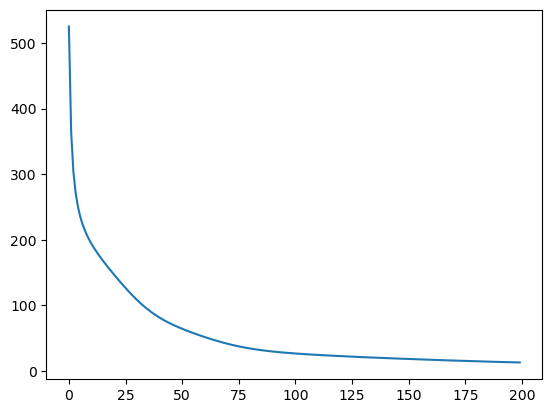

In [172]:
import matplotlib.pyplot as plt

plt.plot(costs)

In [173]:
import numpy as np


iterations = [100, 200, 300]  # 학습 반복 횟수 후보
alphas = [0.001, 0.01, 0.1]   # 학습률 후보
lambdas = [0.001, 0.01, 0.1]  # 정규화 가중치 후보

best_cost = np.inf 
best_hyperparameters = None

for iteration in iterations:
    for alpha in alphas:
        for lambda_ in lambdas:
       
            Theta, X = initialize(R, 5)
            Theta, X, costs = gradient_descent(R, Theta, X, iteration, alpha, lambda_)
            
         
            final_cost = costs[-1]
            
            
            if final_cost != 0 and final_cost < best_cost:
                best_cost = final_cost
                best_hyperparameters = (iteration, alpha, lambda_)


print(f"Best Hyperparameters: Iterations={best_hyperparameters[0]}, Alpha={best_hyperparameters[1]}, Lambda={best_hyperparameters[2]}")
print(f"Best Cost: {best_cost}")


C:\Users\USER\AppData\Local\Temp\ipykernel_5416\2984279591.py:10: RuntimeWarning: overflow encountered in square
  return np.nansum((prediction - R) ** 2)
C:\Users\USER\AppData\Local\Temp\ipykernel_5416\2984279591.py:36: RuntimeWarning: overflow encountered in multiply
  Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
C:\Users\USER\AppData\Local\Temp\ipykernel_5416\2984279591.py:36: RuntimeWarning: invalid value encountered in double_scalars
  Theta[i][k] -= alpha * (np.nansum(error[i, :]*X[k, :]) + lambda_*Theta[i][k])
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_5416\2984279591.py:37: RuntimeWarning: invalid value encountered in double_scalars
  X[k][j] -= alpha * (np.nansum(error[:,j]*Theta[:,k]) + lambda_*X[k][j])
C:\Users\USER\AppData\Local\Temp\ipykernel_5416\2984279591.py

Best Hyperparameters: Iterations=200, Alpha=0.001, Lambda=0.1
Best Cost: 9.243607360888067


In [ ]:
for row in KDA_df.values:
    row -= np.nanmean(row)
    
R = KDA_df.values

Theta, X = initialize(R, 5)

Theta, X, costs = gradient_descent(R, Theta, X, 300, 0.001, 0.01)

In [ ]:
Theta

In [ ]:
X

In [ ]:
pd.DataFrame(predict(Theta, X), index=KDA_df.index, columns=KDA_df.columns)